# Credit Risk Analysis

This project involves conducting exploratory data analysis (EDA) to help develop a machine-learning model for assessing credit risk. The analysis will focus on key features such as applicant age, income, homeownership, employment length, loan intent, and risk grade to uncover patterns and relationships that affect creditworthiness. It will also better evaluate variables like loan amounts, interest rates, approval status, and the percentage of income allocated for loan repayment to understand their potential impact on the target variable.

The ultimate goal of the thorough EDA is to clean, prepare, and visualize the data, uncovering important trends, correlations, and anomalies. These insights will be instrumental in feature selection, data transformation, and most importantly, in enhancing the model's performance. By doing so, the EDA will significantly boost the predictive power of the credit risk model.

- person_age: Applicant’s age in years.
- person_income: Annual income of the applicant in USD.
- person_home_ownership: Status of homeownership (e.g., Rent, Own, Mortgage).
- person_emp_length: Length of employment in years.
- loan_intent: Purpose of the loan (e.g., Education, Medical, Personal).
- loan_grade: Risk grade assigned to the loan, assessing the applicant’s creditworthiness.
- loan_amnt: Total loan amount requested by the applicant.
- loan_int_rate: Interest rate associated with the loan.
- loan_status: The approval status of the loan (approved or not approved).
- loan_percent_income: Percentage of the applicant’s income allocated towards loan repayment.
- cb_person_default_on_file: Indicates if the applicant has a history of default ('Y' for yes, 'N' for no).
- cb_person_cred_hist_length: Length of the applicant’s credit history in years.

## Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.impute import KNNImputer
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

import torch.nn as nn
import torch.optim as optim
import torch
from torch.utils.data import DataLoader, TensorDataset
%matplotlib inline

## Import the dataset

In [2]:
credit = pd.read_csv('credit_risk_dataset.csv')
credit.head()

person_age  person_income person_home_ownership  person_emp_length  \
0          22          59000                  RENT              123.0   
1          21           9600                   OWN                5.0   
2          25           9600              MORTGAGE                1.0   
3          23          65500                  RENT                4.0   
4          24          54400                  RENT                8.0   

  loan_intent loan_grade  loan_amnt  loan_int_rate  loan_status  \
0    PERSONAL          D      35000          16.02            1   
1   EDUCATION          B       1000          11.14            0   
2     MEDICAL          C       5500          12.87            1   
3     MEDICAL          C      35000          15.23            1   
4     MEDICAL          C      35000          14.27            1   

   loan_percent_income cb_person_default_on_file  cb_person_cred_hist_length  
0                 0.59                         Y                           3  
1                 0.10                         N                           2  
2                 0.57                         N                           3  
3                 0.53                         N                           2  
4                 0.55                         Y                           4

# Exploratory Data Analysis 

## First Glance at the Data

### Statistics:

In [3]:
credit.describe()

person_age  person_income  person_emp_length     loan_amnt  \
count  32581.000000   3.258100e+04       31686.000000  32581.000000   
mean      27.734600   6.607485e+04           4.789686   9589.371106   
std        6.348078   6.198312e+04           4.142630   6322.086646   
min       20.000000   4.000000e+03           0.000000    500.000000   
25%       23.000000   3.850000e+04           2.000000   5000.000000   
50%       26.000000   5.500000e+04           4.000000   8000.000000   
75%       30.000000   7.920000e+04           7.000000  12200.000000   
max      144.000000   6.000000e+06         123.000000  35000.000000   

       loan_int_rate   loan_status  loan_percent_income  \
count   29465.000000  32581.000000         32581.000000   
mean       11.011695      0.218164             0.170203   
std         3.240459      0.413006             0.106782   
min         5.420000      0.000000             0.000000   
25%         7.900000      0.000000             0.090000   
50%        10.990000      0.000000             0.150000   
75%        13.470000      0.000000             0.230000   
max        23.220000      1.000000             0.830000   

       cb_person_cred_hist_length  
count                32581.000000  
mean                     5.804211  
std                      4.055001  
min                      2.000000  
25%                      3.000000  
50%                      4.000000  
75%                      8.000000  
max                     30.000000

### Data Types

In [4]:
credit.dtypes

person_age                      int64
person_income                   int64
person_home_ownership          object
person_emp_length             float64
loan_intent                    object
loan_grade                     object
loan_amnt                       int64
loan_int_rate                 float64
loan_status                     int64
loan_percent_income           float64
cb_person_default_on_file      object
cb_person_cred_hist_length      int64
dtype: object

## information 

In [5]:
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


- person_age: Applicant’s age in years.
- person_income: Annual income of the applicant in USD.
- person_home_ownership: Status of homeownership (e.g., Rent, Own, Mortgage).
- person_emp_length: Length of employment in years.
- loan_intent: Purpose of the loan (e.g., Education, Medical, Personal).
- loan_grade: Risk grade assigned to the loan, assessing the applicant’s creditworthiness.
- loan_amnt: Total loan amount requested by the applicant.
- loan_int_rate: Interest rate associated with the loan.
- loan_status: The approval status of the loan (approved or not approved).
- loan_percent_income: Percentage of the applicant’s income allocated towards loan repayment.
- cb_person_default_on_file: Indicates if the applicant has a history of default ('Y' for yes, 'N' for no).
- cb_person_cred_hist_length: Length of the applicant’s credit history in years.

In [6]:
categories = credit.select_dtypes(include=['object']).columns
print(categories)

Index(['person_home_ownership', 'loan_intent', 'loan_grade',
       'cb_person_default_on_file'],
      dtype='object')


## Unique Values in Categorical Data

In [7]:
for cat in categories : 
    print(cat)
    print(credit[cat].unique())

person_home_ownership
['RENT' 'OWN' 'MORTGAGE' 'OTHER']
loan_intent
['PERSONAL' 'EDUCATION' 'MEDICAL' 'VENTURE' 'HOMEIMPROVEMENT'
 'DEBTCONSOLIDATION']
loan_grade
['D' 'B' 'C' 'A' 'E' 'F' 'G']
cb_person_default_on_file
['Y' 'N']


## Missing Values

In [8]:
credit.isna().sum()

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3116
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

## Outliers Visualization

In [9]:
# Handle outliers. Detect and manage outliers within the dataset.

def get_outliers(col , df , dist=4) :
    '''
    Parameters:
        - col : the feature that contains outliers
        - df  : the dataframe containing the feature
    '''
    # Calculate the z-score
    
    df['z_score'] = (df[col] - df[col].mean()) / df[col].std()
    
    # Indices of the data points which are more than 2 deviations away from the mean.
    # which means z_score > 2
    outliers = df[np.abs(df['z_score'])>dist]
    index = outliers.index
    
    #drop the temporary 'z_score' column from the dataframe
    df.drop(columns=['z_score'], inplace=True)
    return index


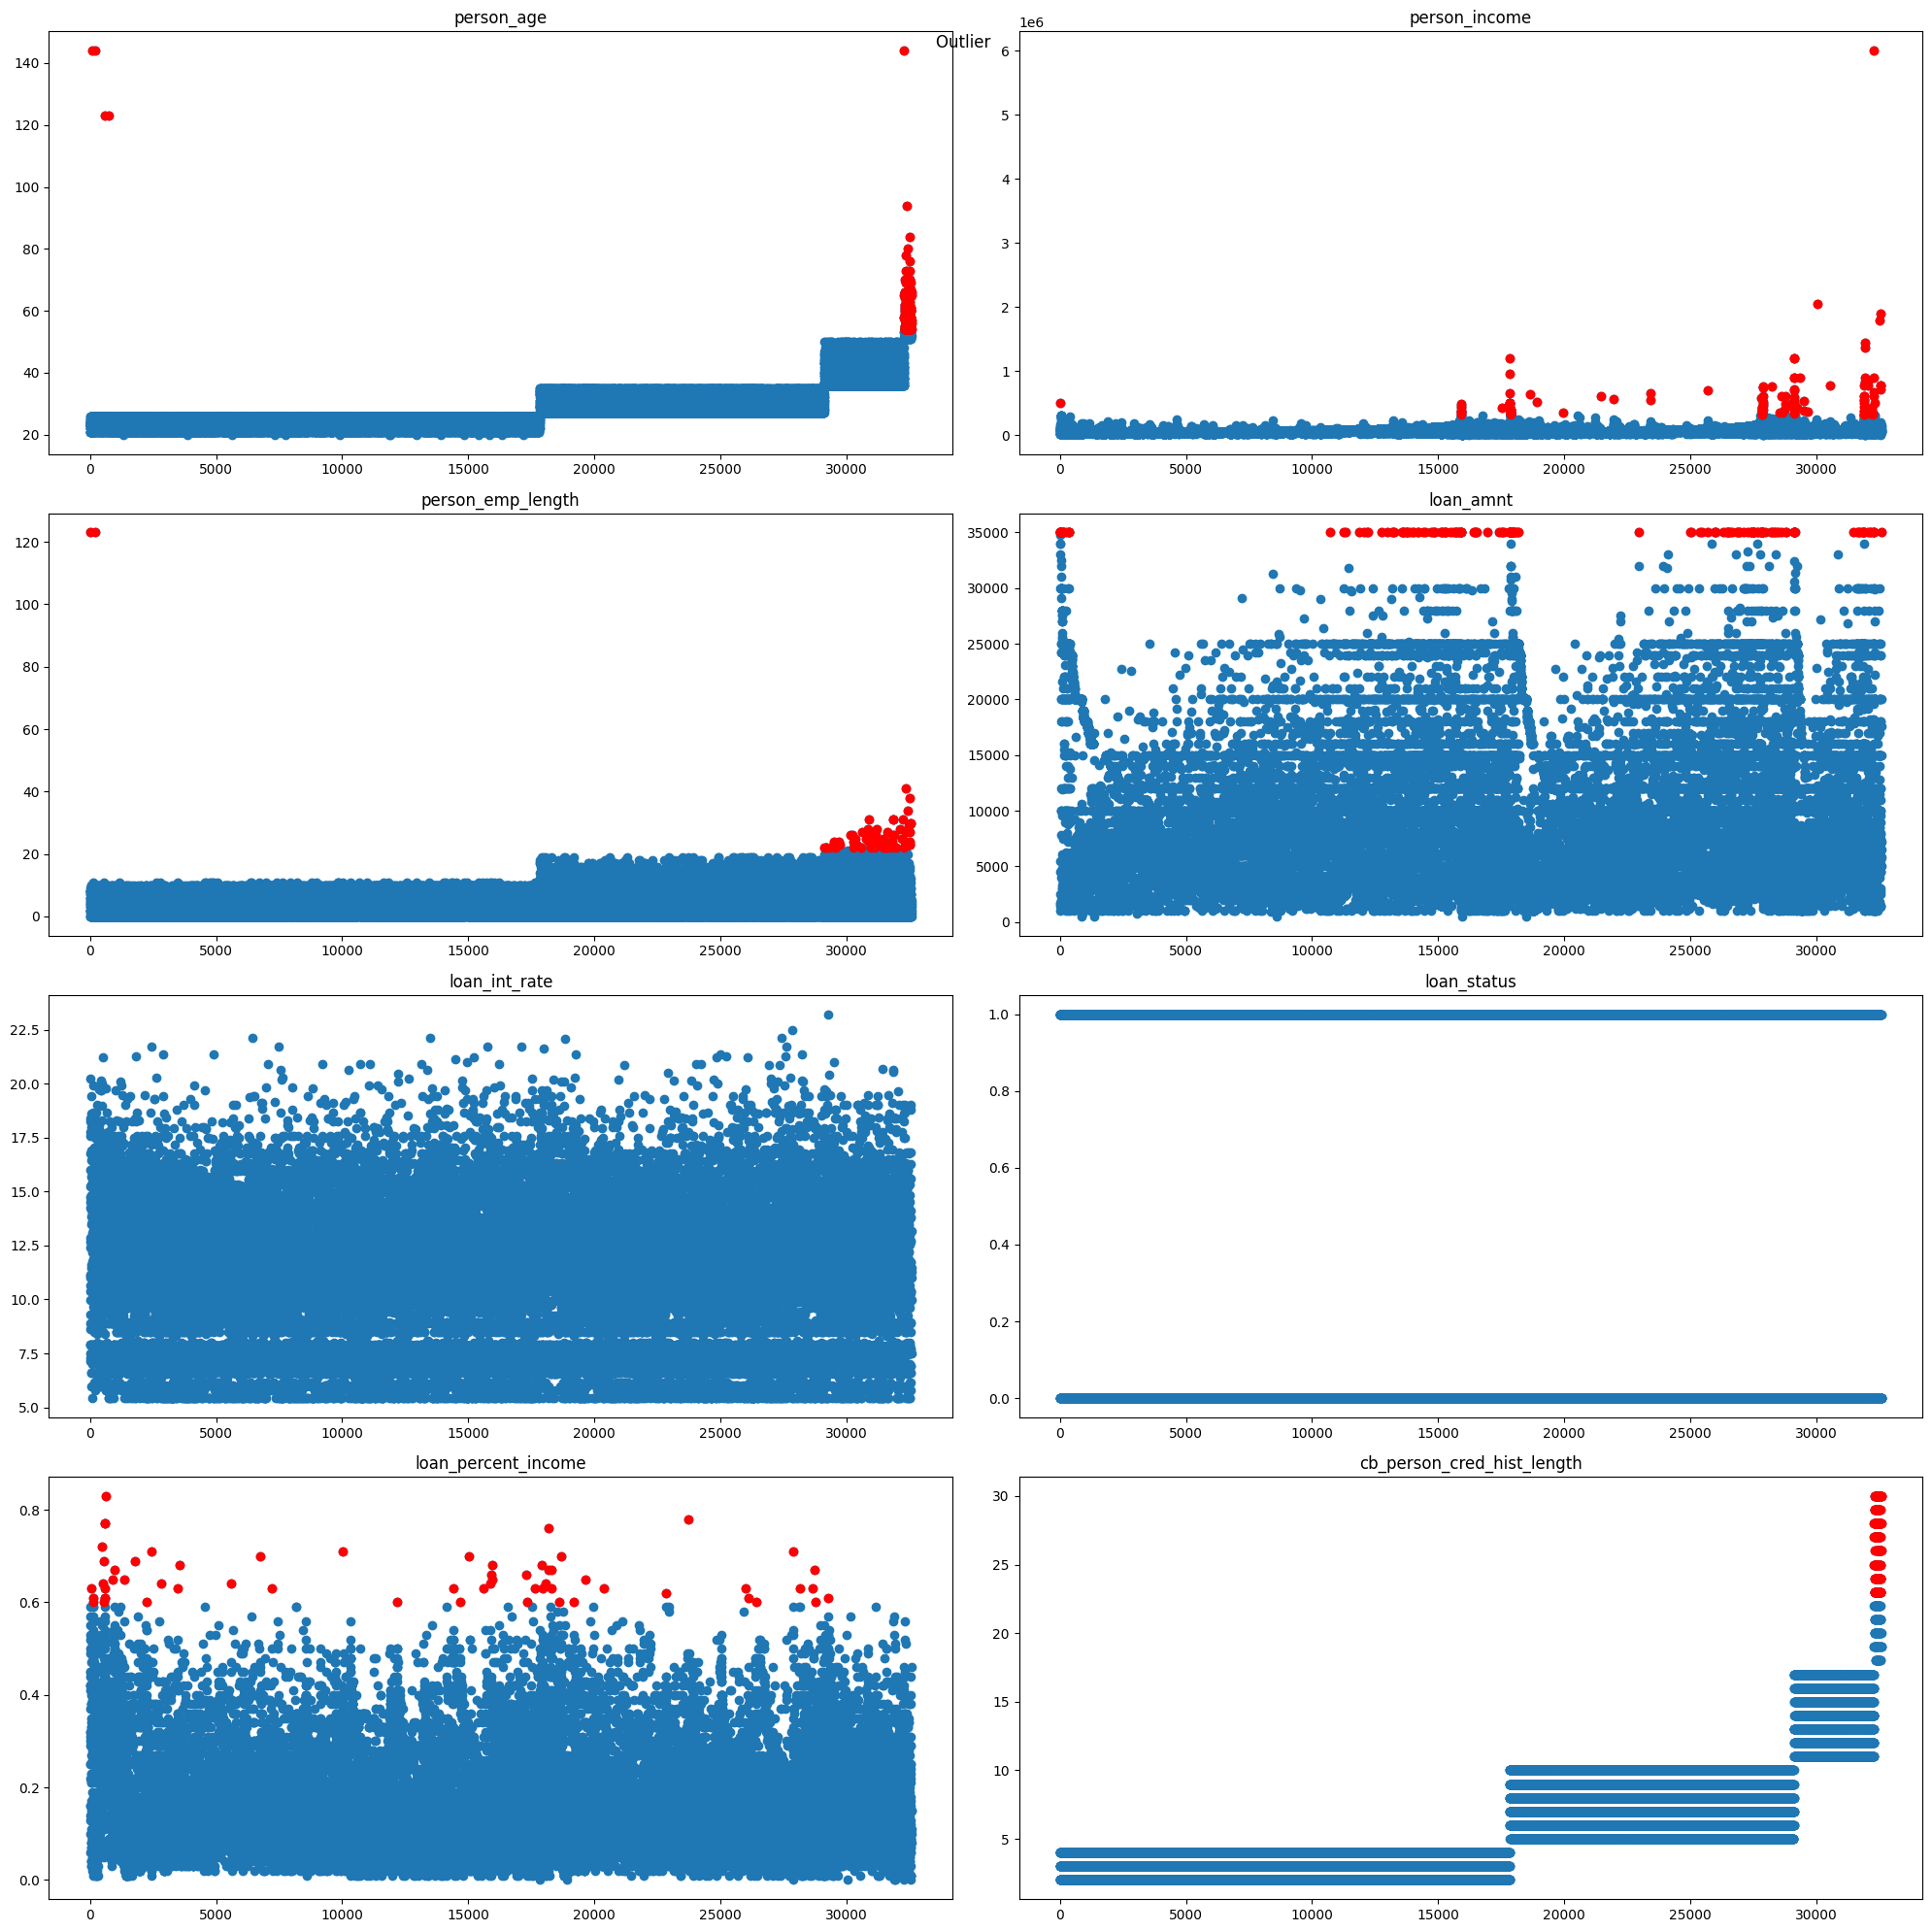

In [10]:
non_categories = credit.select_dtypes(exclude=['object']).columns

# Check for columns with outliers in the data

fig , axes = plt.subplots(4,2,figsize=(20,20))

axes = axes.flatten()
for i,col in enumerate(non_categories) :
    outliers = get_outliers(col , credit , 4)
    axes[i].scatter(credit.index , credit[col])
    axes[i].scatter(credit.index[outliers], credit.loc[outliers ,[col]], color='red')
    axes[i].set_title(col)
    
for j in range(i+1,8) : 
    fig.delaxes(axes[j])
    
plt.tight_layout()
plt.suptitle('Outlier ')
plt.show()

## Duplicate Rows detection

In [11]:
duplicates_df = credit[credit.duplicated(keep=False)]

# Sort the duplicate rows for better visibility (optional)
duplicates_df_sorted = duplicates_df.sort_values(by=credit.columns.tolist())

# Display the duplicate rows as a DataFrame
print(duplicates_df_sorted)

       person_age  person_income person_home_ownership  person_emp_length  \
15944          21           8088                  RENT                NaN   
16835          21           8088                  RENT                NaN   
2431           21          15600                  RENT                0.0   
17758          21          15600                  RENT                0.0   
2498           21          18000                  RENT                0.0   
...           ...            ...                   ...                ...   
32010          42          39996              MORTGAGE                2.0   
29484          43          11340                  RENT                4.0   
32279          43          11340                  RENT                4.0   
31676          49         120000              MORTGAGE               12.0   
32172          49         120000              MORTGAGE               12.0   

             loan_intent loan_grade  loan_amnt  loan_int_rate  loan_status 

# Data Cleaning and Preprocessing

In [12]:
### Remove Duplicates and print before and after shapes. 
print('Before dropping duplicate rows: '+ str(credit.shape))
credit.drop_duplicates(inplace=True)
print('After dropping duplicate rows:',credit.shape)

Before dropping duplicate rows: (32581, 12)
After dropping duplicate rows: (32416, 12)


## Imputing Missing Values and Outlier handling

In [13]:
print("Count of NaN values before outliers are set to NaN: ")
credit.isna().sum()

Count of NaN values before outliers are set to NaN: 


person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              887
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3095
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

In [14]:
# List of int64 type columns
int_cols = credit.select_dtypes(include=['int64']).columns

# Set Outliers as NaN 
for col in non_categories : 
    credit.loc[get_outliers(col , credit, 4), col] = np.nan 

print("NaN values after outliers are set to NaN:")
print(credit.isna().sum())

NaN values after outliers are set to NaN:
person_age                     183
person_income                  126
person_home_ownership            0
person_emp_length              960
loan_intent                      0
loan_grade                       0
loan_amnt                      184
loan_int_rate                 3095
loan_status                      0
loan_percent_income             60
cb_person_default_on_file        0
cb_person_cred_hist_length     171
dtype: int64


In [15]:
# Define KNN Imputer to handle Missing Values
imputer = KNNImputer(n_neighbors=4)

numeric_cols = credit.select_dtypes(include=['float64', 'int64']).columns
imputed_data = imputer.fit_transform(credit[numeric_cols])
credit[numeric_cols] = imputed_data

In [16]:
credit.isna().sum()

person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_status                   0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
dtype: int64

In [17]:
# Reverting int64 type features back to int64 as they get changed to float64. 
for col in int_cols : 
    credit[col] = credit[col].astype('int64')

## Dropping duplicate rows

In [18]:
### Remove Duplicates and print before and after shapes. 
print('Before dropping duplicate rows: '+ str(credit.shape))
credit.drop_duplicates(inplace=True)
print('After dropping duplicate rows:',credit.shape)

Before dropping duplicate rows: (32416, 12)
After dropping duplicate rows: (32411, 12)


## Data visualization

### Distribution of Target variable

/tmp/ipykernel_29840/3342737170.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=loan_status_counts.index, y=loan_status_counts.values, palette='Set2', ax=axes[1])


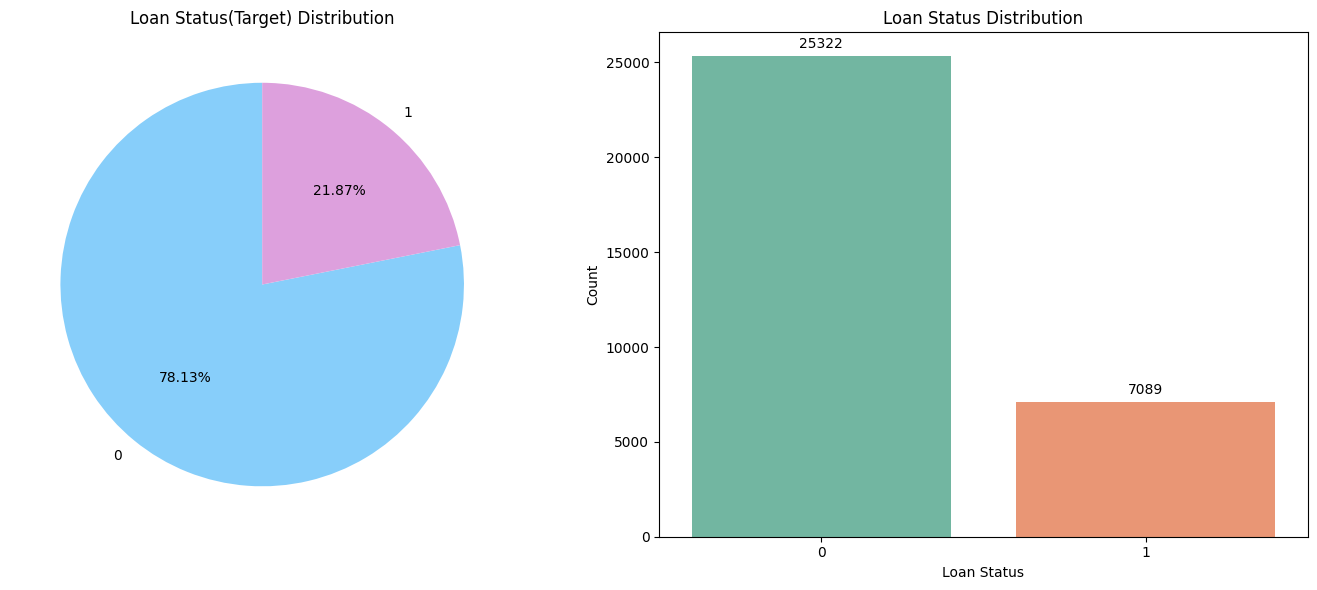

In [19]:
loan_status_counts = credit['loan_status'].value_counts()

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

axes[0].pie(loan_status_counts, labels=loan_status_counts.index, autopct='%1.2f%%', startangle=90, colors=['lightskyblue', 'plum'])
axes[0].set_title('Loan Status(Target) Distribution')

ax = sns.barplot(x=loan_status_counts.index, y=loan_status_counts.values, palette='Set2', ax=axes[1])

for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 9), textcoords='offset points')

axes[1].set_title('Loan Status Distribution')
axes[1].set_xlabel('Loan Status')
axes[1].set_ylabel('Count')

plt.tight_layout()
plt.show()

## Univariate Analysis

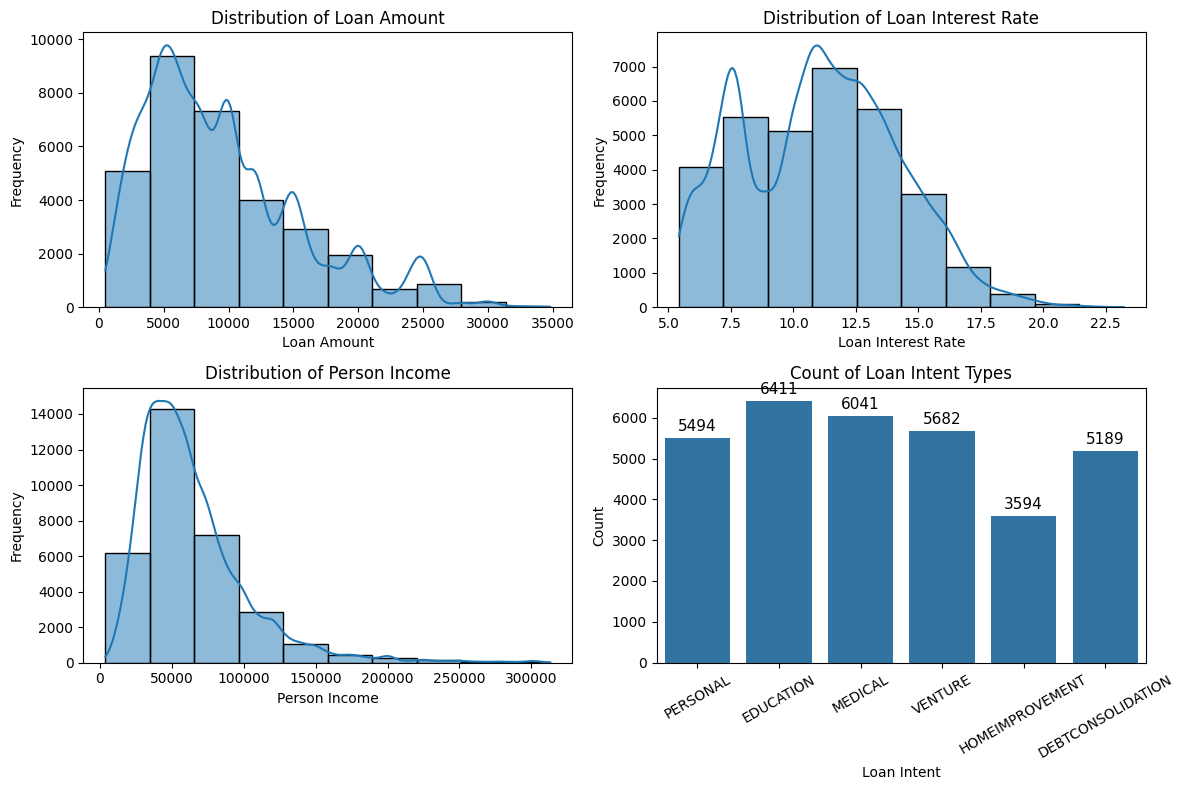

In [20]:
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
# plt.figure(figsize=(10, 4))
sns.histplot(credit['loan_amnt'], bins=10, kde=True)
plt.title('Distribution of Loan Amount')
plt.xlabel('Loan Amount')
plt.ylabel('Frequency')

plt.subplot(2,2,2)
sns.histplot(credit['loan_int_rate'], bins=10, kde=True)
plt.title('Distribution of Loan Interest Rate')
plt.xlabel('Loan Interest Rate')
plt.ylabel('Frequency')

plt.subplot(2,2,3)
sns.histplot(credit['person_income'], bins=10, kde=True)
plt.title('Distribution of Person Income')
plt.xlabel('Person Income')
plt.ylabel('Frequency')

plt.subplot(2,2,4)
ax=sns.countplot(x='loan_intent', data=credit)
plt.title('Count of Loan Intent Types')
plt.xlabel('Loan Intent')
plt.xticks(rotation=30)
plt.ylabel('Count')
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='baseline', fontsize=11, color='black',
                xytext=(0, 5), textcoords='offset points')

plt.tight_layout()
plt.show()

This is a univariate visualization that illustrates the frequency distribution of various features, providing insight into the occurrence and spread of individual variables within the dataset.

## Bivariate Analysis

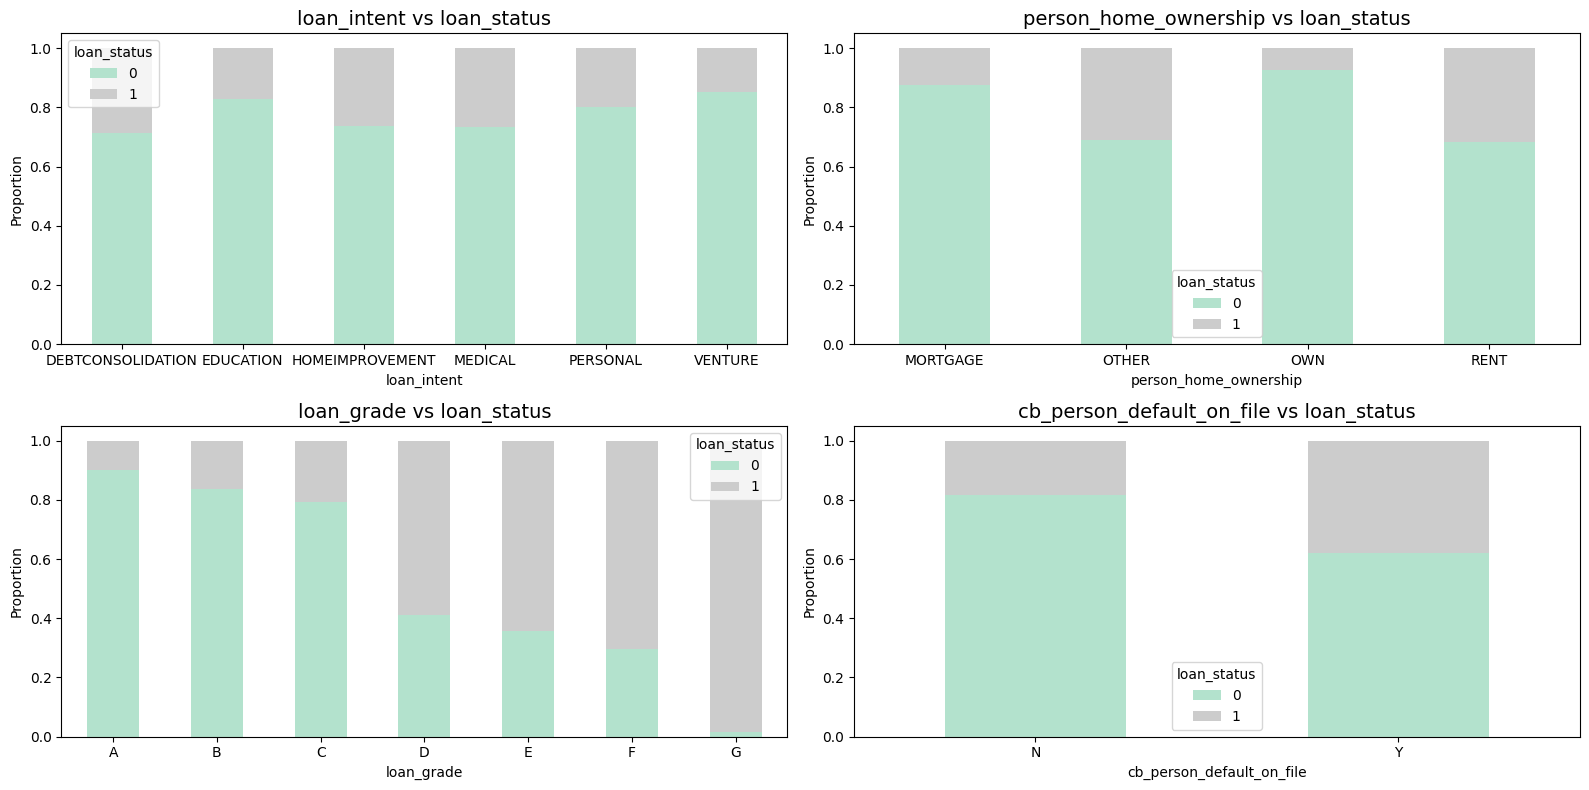

In [21]:
def stacked_bar(ax, data, feature, target='loan_status'):
    cross = pd.crosstab(data[feature], data[target], normalize='index')
    cross.plot(kind='bar', stacked=True, ax=ax, colormap='Pastel2')
    ax.set_title(f'{feature} vs {target}', fontsize=14)
    ax.set_ylabel('Proportion')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=0)

# Create a 2x2 grid of subplots
fig, axs = plt.subplots(2, 2, figsize=(16, 8))

# List of features to visualize
features = ['loan_intent', 'person_home_ownership', 'loan_grade', 'cb_person_default_on_file']

axs = axs.flatten()

for i, feature in enumerate(features):
    #Stacked bar plots for each feature
    stacked_bar(axs[i], credit, feature)

plt.tight_layout()
plt.show()

The graphs above show the relation of the categorical variables with the target variable ('loan_status')

/tmp/ipykernel_29840/823032503.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_bin = data_cpy.groupby(bin_column+'_bins')[y_column].mean().reset_index()
/tmp/ipykernel_29840/823032503.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_bin = data_cpy.groupby(bin_column+'_bins')[y_column].mean().reset_index()
/tmp/ipykernel_29840/823032503.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_bin = dat

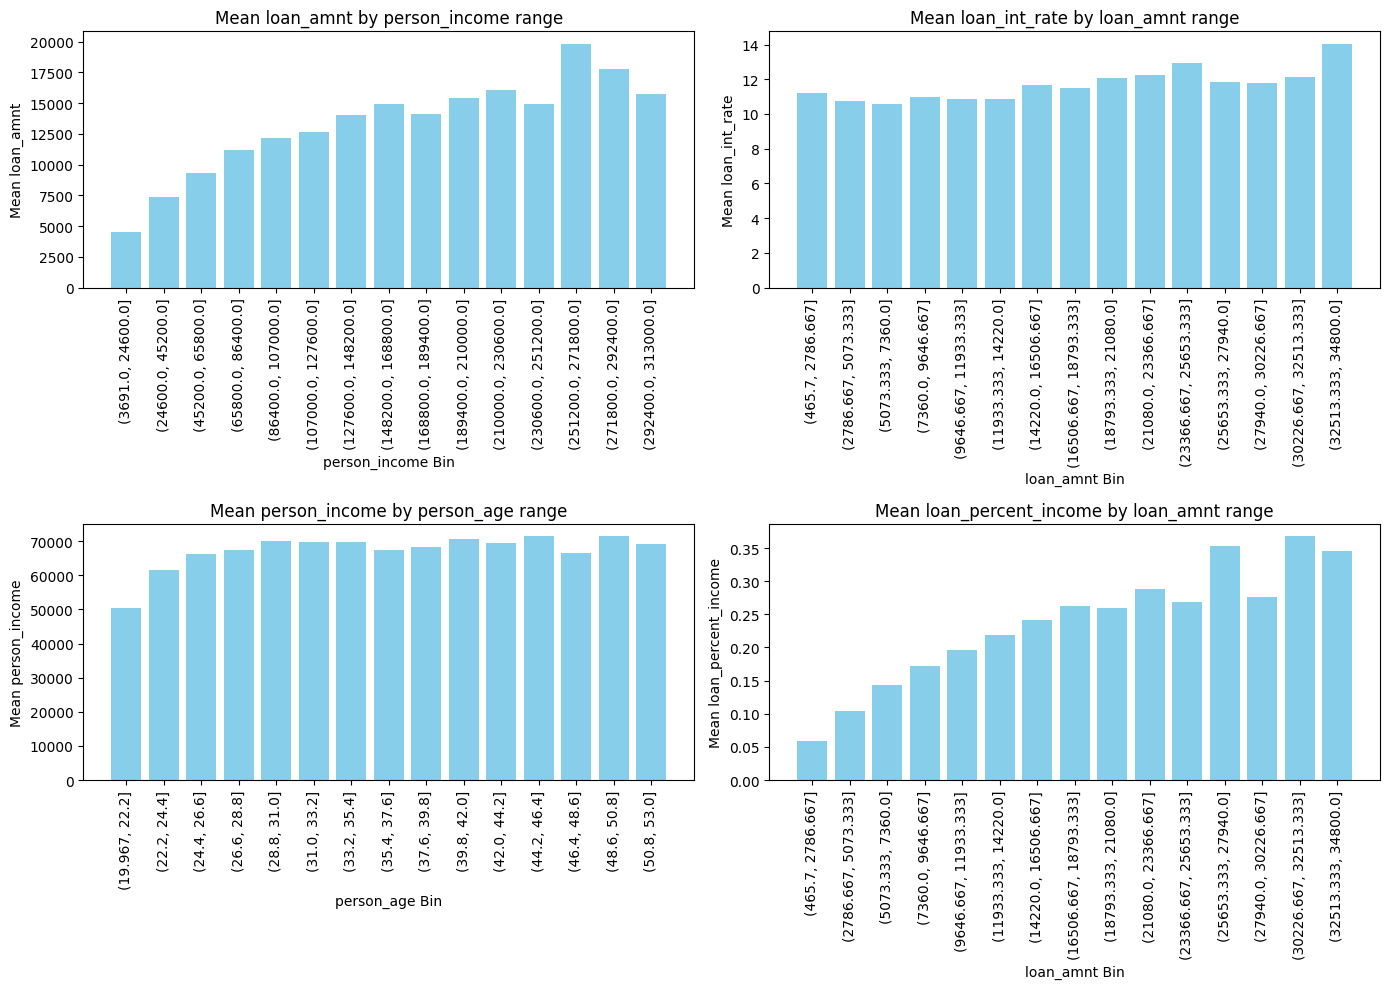

In [22]:
import matplotlib.pyplot as plt
import pandas as pd

def bin_visualization(ax, data, bin_column, y_column, num_bins):
    data_cpy = data.copy()
    
    # Create bins for the specified column
    data_cpy[bin_column+'_bins'] = pd.cut(data_cpy[bin_column], bins=num_bins)
    
    # Group by the bins and calculate the mean of the target column
    mean_bin = data_cpy.groupby(bin_column+'_bins')[y_column].mean().reset_index()

    # Plot the bar chart on the specific subplot axis (ax)
    ax.bar(mean_bin[bin_column+'_bins'].astype(str), mean_bin[y_column], color='skyblue')
    ax.set_title(f'Mean {y_column} by {bin_column} range')
    ax.set_xlabel(f'{bin_column} Bin')
    ax.set_ylabel(f'Mean {y_column}')
    ax.tick_params(axis='x', rotation=90)

# Create subplots: 2x2 grid (adjust rows and cols based on how many plots you need)
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Visualize different binning  in subplots
bin_visualization(axes[0, 0], credit, 'person_income', 'loan_amnt', 15)    
bin_visualization(axes[0, 1], credit, 'loan_amnt', 'loan_int_rate', 15)    
bin_visualization(axes[1, 0], credit, 'person_age', 'person_income', 15)   
bin_visualization(axes[1,1],credit , 'loan_amnt' , 'loan_percent_income',15)
# Adjust layout to avoid overlap.
plt.tight_layout()

# Show the figure
plt.show()

The graph presents an aggregated visualization (Mean, specifically) of selected continuous features, where the data has been divided into bins to showcase the distribution and trends within each range.

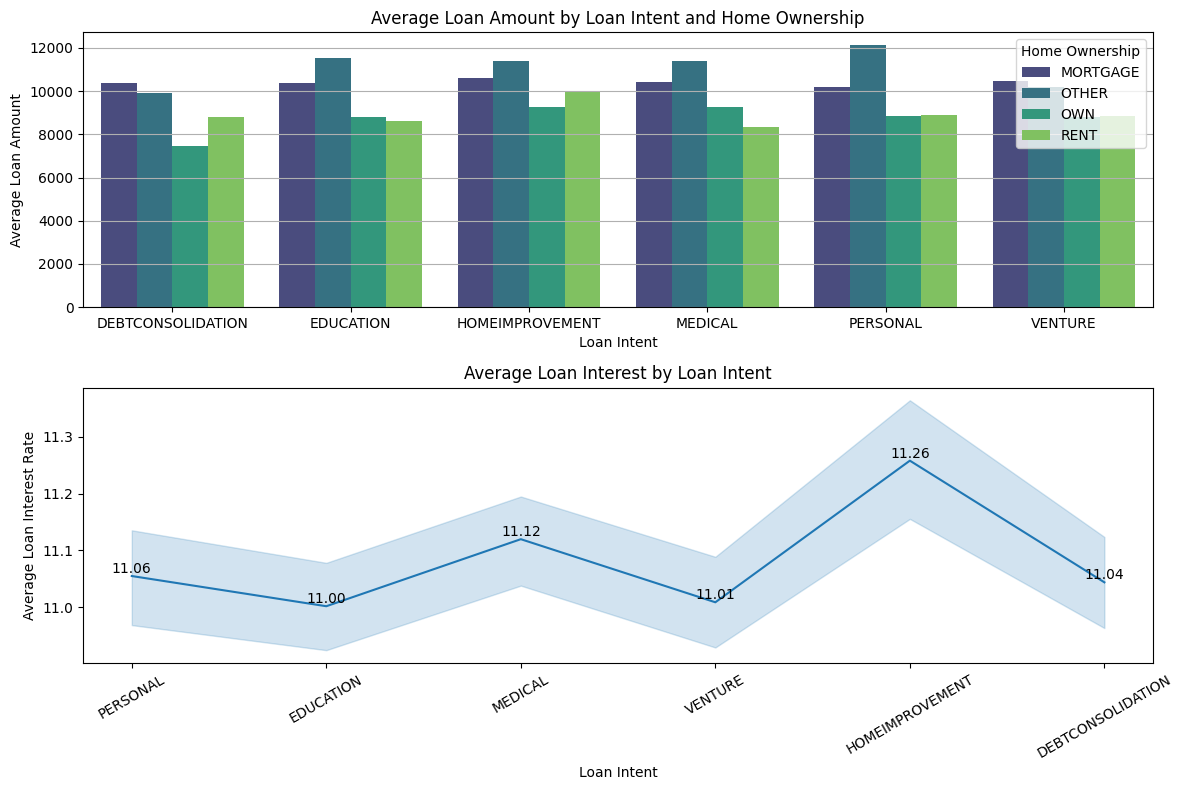

In [23]:
plt.figure(figsize=(12, 8))

plt.subplot(2,1,1)
mean_loan_amounts = credit.groupby(['loan_intent', 'person_home_ownership'])['loan_amnt'].mean().reset_index()
sns.barplot(x='loan_intent', y='loan_amnt', hue='person_home_ownership', data=mean_loan_amounts, palette='viridis')
plt.title('Average Loan Amount by Loan Intent and Home Ownership')
plt.xlabel('Loan Intent')
plt.ylabel('Average Loan Amount')
plt.legend(title='Home Ownership')
plt.grid(axis='y')

plt.subplot(2,1,2)
ax=sns.lineplot(x='loan_intent', y='loan_int_rate', data=credit, estimator='mean')

for line in ax.lines:
    for x_value, y_value in zip(line.get_xdata(), line.get_ydata()):
        plt.text(x_value, y_value, f'{y_value:.2f}', color='black', ha='center', va='bottom')

plt.title('Average Loan Interest by Loan Intent')
plt.xlabel('Loan Intent')
plt.xticks(rotation =30)
plt.ylabel('Average Loan Interest Rate')

plt.tight_layout()
plt.show()

the first subplot shows a plot of grouped categorical data, Loan Intent and Home ownership with the average loan amount. Second subplot shows Average  Loan Intent in a line graph.

/tmp/ipykernel_29840/2372224423.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='loan_status', y='person_income', data=credit, palette='pastel')


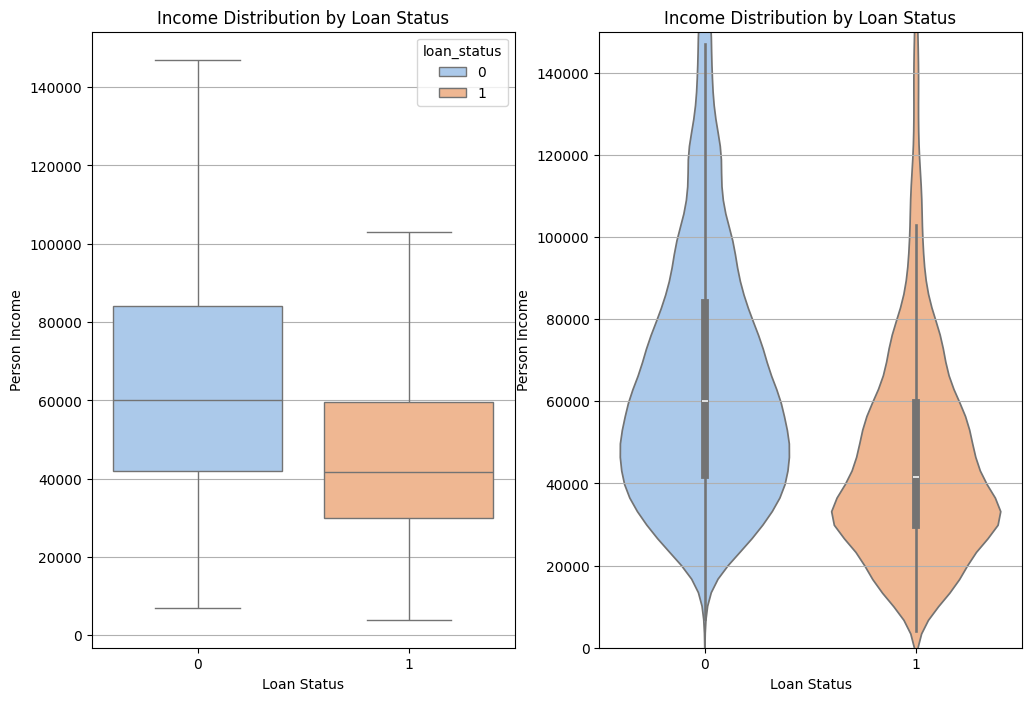

In [24]:
plt.figure(figsize=(12, 8))

plt.subplot(1,2,1)
sns.boxplot(x='loan_status', y='person_income', hue='loan_status', data=credit,
            showfliers=False,palette='pastel')
plt.title('Income Distribution by Loan Status')
plt.xlabel('Loan Status')
plt.ylabel('Person Income')
plt.grid(axis='y')

plt.subplot(1,2,2)
sns.violinplot(x='loan_status', y='person_income', data=credit, palette='pastel')
plt.title('Income Distribution by Loan Status')
plt.xlabel('Loan Status')
plt.ylabel('Person Income')
plt.ylim(0,150000)
plt.grid(axis='y')

plt.show()

The subplots illustrate the relationship between personal income and loan status. The first subplot displays a box plot, providing a summary of the income distribution across loan statuses, while the second subplot features a violin plot, which visualizes the data's density and distribution, highlighting variations in income for each loan status.

In [25]:
credit_cpy=credit.copy()
bins = [2, 3, 4, 5, 6, 8,10,15,30]
labels=('0-2','2,3','3,4','4,5','5,6','6-8','8-10','10-15','15-30')

credit_cpy['hist_bins'] = pd.cut(credit_cpy['cb_person_cred_hist_length'], bins=bins, right=False)

plt.figure(figsize=(10, 6))
ax=sns.countplot(x='hist_bins', hue='loan_status', data=credit_cpy, palette='pastel')

for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='baseline', fontsize=12, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.title('Count of Credit History Length by Loan Status')
plt.xlabel('Credit History Length (Binned)')
plt.ylabel('Count')
plt.legend(title='Loan Status')
plt.grid(axis='y')

The visualization depicts the frequency of individuals categorized by the length of their credit history in relation to their loan status, providing insights into how credit history duration influences loan approvals and rejections.

## Feature Scaling (MinMax Normalization)

In [26]:
# Select dtypes excluding the target variable
numeric_cols = credit.select_dtypes(include=['float64', 'int64']).columns.difference(['loan_status'])
# Fit MinMaxScaler on the dependent variables
scaler = MinMaxScaler()
credit[numeric_cols] = scaler.fit_transform(credit[numeric_cols])

In [27]:
credit.describe()

person_age  person_income  person_emp_length     loan_amnt  \
count  32411.000000   32411.000000       32411.000000  32411.000000   
mean       0.229872       0.194493           0.228087      0.261694   
std        0.173739       0.122235           0.185105      0.176188   
min        0.000000       0.000000           0.000000      0.000000   
25%        0.090909       0.111650           0.095238      0.131195   
50%        0.181818       0.165049           0.190476      0.218659   
75%        0.303030       0.242718           0.333333      0.335277   
max        1.000000       1.000000           1.000000      1.000000   

       loan_int_rate   loan_status  loan_percent_income  \
count   32411.000000  32411.000000         32411.000000   
mean        0.317373      0.218722             0.286773   
std         0.175599      0.413386             0.177640   
min         0.000000      0.000000             0.000000   
25%         0.172402      0.000000             0.152542   
50%         0.319663      0.000000             0.254237   
75%         0.438764      0.000000             0.389831   
max         1.000000      1.000000             1.000000   

       cb_person_cred_hist_length  
count                32411.000000  
mean                     0.186113  
std                      0.189554  
min                      0.000000  
25%                      0.050000  
50%                      0.100000  
75%                      0.300000  
max                      1.000000

In [28]:
credit.head()

person_age  person_income person_home_ownership  person_emp_length  \
0    0.060606       0.177994                  RENT           0.178571   
1    0.030303       0.018123                   OWN           0.238095   
2    0.151515       0.018123              MORTGAGE           0.047619   
3    0.090909       0.199029                  RENT           0.190476   
4    0.121212       0.163107                  RENT           0.380952   

  loan_intent loan_grade  loan_amnt  loan_int_rate  loan_status  \
0    PERSONAL          D   0.334548       0.595506            1   
1   EDUCATION          B   0.014577       0.321348            0   
2     MEDICAL          C   0.145773       0.418539            1   
3     MEDICAL          C   0.421283       0.551124            1   
4     MEDICAL          C   0.437318       0.497191            1   

   loan_percent_income cb_person_default_on_file  cb_person_cred_hist_length  
0             1.000000                         Y                        0.05  
1             0.169492                         N                        0.00  
2             0.966102                         N                        0.05  
3             0.898305                         N                        0.00  
4             0.932203                         Y                        0.10

## Label Encoding:

In [29]:
label_encoded_cols={}
label_mapping = {} 
for column in credit.select_dtypes(include=['object']).columns:
        label_encoder = LabelEncoder()
        credit[column] = label_encoder.fit_transform(credit[column].astype(str)).astype(str)
        label_encoded_cols[column] = label_encoder
        
        label_mapping[column] = dict(zip(label_encoder.classes_, range(len(label_encoder.classes_))))
for column in label_encoded_cols.keys():
    credit[column] = credit[column].astype(int)

In [30]:
print('Label Mapping for categorical data: ')
label_mapping

Label Mapping for categorical data: 


{'person_home_ownership': {'MORTGAGE': 0, 'OTHER': 1, 'OWN': 2, 'RENT': 3},
 'loan_intent': {'DEBTCONSOLIDATION': 0,
  'EDUCATION': 1,
  'HOMEIMPROVEMENT': 2,
  'MEDICAL': 3,
  'PERSONAL': 4,
  'VENTURE': 5},
 'loan_grade': {'A': 0, 'B': 1, 'C': 2, 'D': 3, 'E': 4, 'F': 5, 'G': 6},
 'cb_person_default_on_file': {'N': 0, 'Y': 1}}

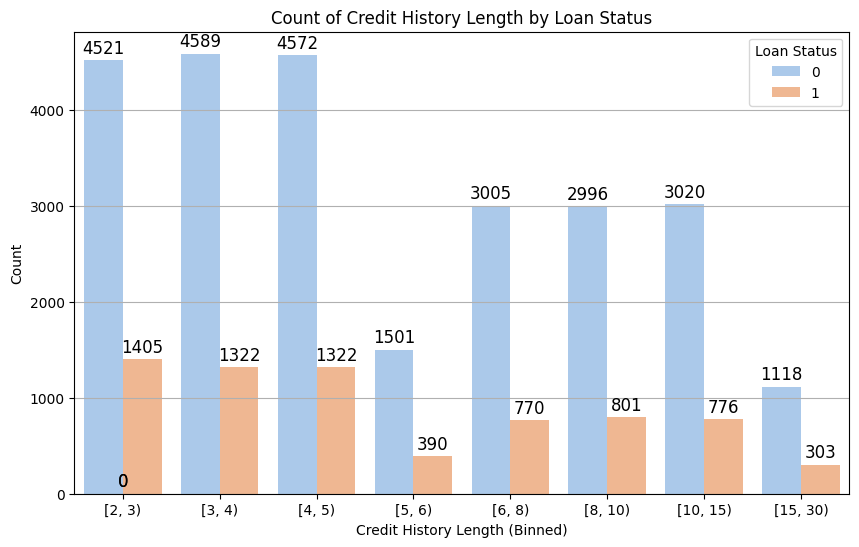

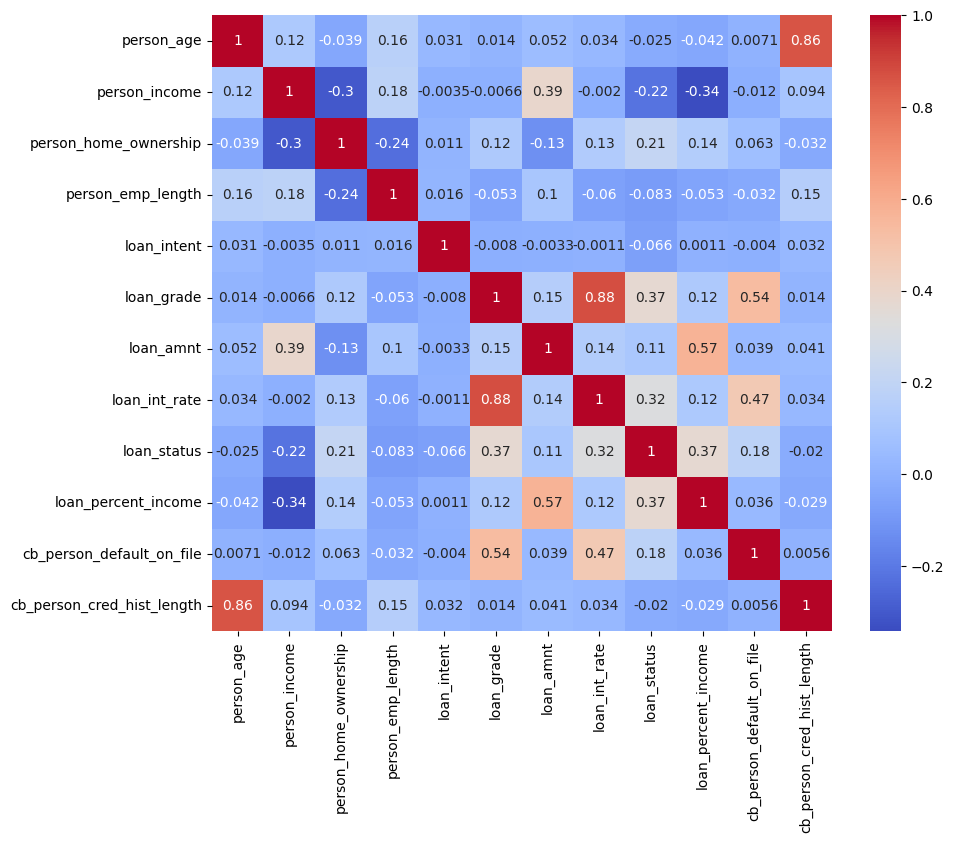

In [31]:
# Correlation heatmap for numeric columns only
plt.figure(figsize=(10,8))

# Filter the DataFrame to include only numeric columns
numeric_df = credit.select_dtypes(include=[np.number])

# Generate the correlation heatmap
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.show()

In [32]:
print('Label Encoded and Normalized Dataset:')
credit.head()

Label Encoded and Normalized Dataset:


person_age  person_income  person_home_ownership  person_emp_length  \
0    0.060606       0.177994                      3           0.178571   
1    0.030303       0.018123                      2           0.238095   
2    0.151515       0.018123                      0           0.047619   
3    0.090909       0.199029                      3           0.190476   
4    0.121212       0.163107                      3           0.380952   

   loan_intent  loan_grade  loan_amnt  loan_int_rate  loan_status  \
0            4           3   0.334548       0.595506            1   
1            1           1   0.014577       0.321348            0   
2            3           2   0.145773       0.418539            1   
3            3           2   0.421283       0.551124            1   
4            3           2   0.437318       0.497191            1   

   loan_percent_income  cb_person_default_on_file  cb_person_cred_hist_length  
0             1.000000                          1                        0.05  
1             0.169492                          0                        0.00  
2             0.966102                          0                        0.05  
3             0.898305                          0                        0.00  
4             0.932203                          1                        0.10

# Conclusoin

This project provides valuable insights into credit risk by analyzing various factors associated with loan applications. We can identify key patterns and correlations that influence creditworthiness by examining applicant characteristics such as age, income, homeownership, employment length, and loan intent. Evaluating loan amounts, interest rates, approval status further enhances our understanding of the factors driving loan approval decisions. 

The findings from the exploratory data analysis and visualizations can be instrumental in training a machine 
learning model to predict the target (loan_status).

# References 

- NumPy: https://numpy.org/doc/stable/
- SciPy: https://docs.scipy.org/doc/scipy/
- Matplotlib: https://matplotlib.org/stable/contents.html
- Scikit-learn: https://scikit-learn.org/stable/documentation.html
- Seaborn: https://seaborn.pydata.org/
- Pandas: https://pandas.pydata.org/pandas-docs/stable/

# Phase 2

Class imbalance can hinder a model's ability to accurately learn patterns from the minority class. One of the effective approachers to address this issue is using autoencoders to generate synthetic data. By creating additional data points for the minority class, autoencoders help balance the class distributioin, thereby improving the model's ability to learn and generalize form both the classes.

In [33]:
# Function to show class balance
def show_class_balance(data) :
    loan_status_counts = data['loan_status'].value_counts()
    fig, axes = plt.subplots(1, 2, figsize=(14, 6))
    # Pie chart for loan status distribution
    axes[0].pie(loan_status_counts, labels=loan_status_counts.index, autopct='%1.2f%%', 
                startangle=90, colors=['lightskyblue', 'plum'])
    axes[0].set_title('Loan Status (Target) Distribution')
    # Bar plot for loan status distribution
    sns.barplot(x=loan_status_counts.index, y=loan_status_counts.values, palette='Set2', ax=axes[1], hue=loan_status_counts.index)
    axes[1].get_legend()
    # Annotate bar plot
    for p in axes[1].patches:
        axes[1].annotate(f'{p.get_height():.0f}', 
                         (p.get_x() + p.get_width() / 2., p.get_height()),
                         ha='center', va='center', xytext=(0, 9), textcoords='offset points')
    axes[1].set_title('Loan Status Distribution')
    axes[1].set_xlabel('Loan Status')
    axes[1].set_ylabel('Count')
    plt.tight_layout()
    plt.show()

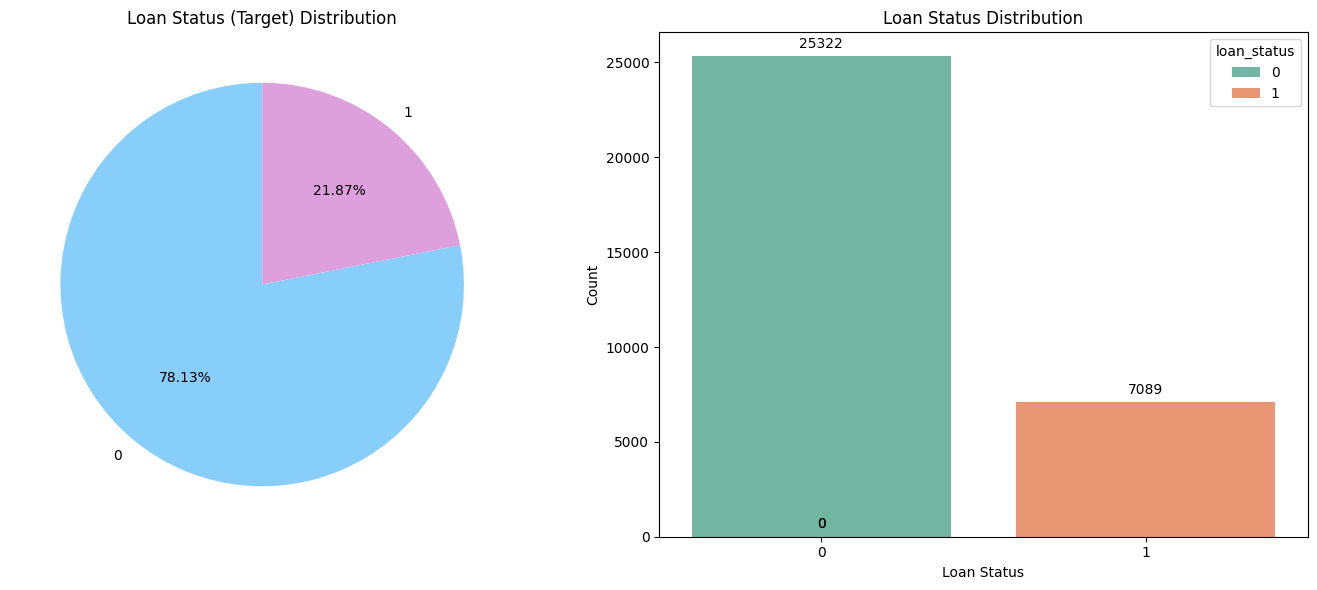

In [34]:
show_class_balance(credit)

This is not good, there is a significant imbalance in the data. 

# Generating Synthetic Data for Minority class

In [35]:
# Define the autoencoder
class Autoencoder(nn.Module):
    def __init__(self, input_dim):
        super(Autoencoder, self).__init__()
        self.encoder = nn.Sequential(
            nn.Linear(input_dim, 64),
            nn.ReLU(),
            nn.Linear(64, 32)  # Bottleneck layer
        )
        self.decoder = nn.Sequential(
            nn.Linear(32, 64),
            nn.ReLU(),
            nn.Linear(64, input_dim),
            nn.Sigmoid()  # Ensure outputs are in the same range as inputs
        )

    def forward(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded

In [36]:
# scaler =MinMaxScaler()
def generate_synthetic_data( data, model, tensor, scaler, noise) :
    latent_vectors = model.encoder(tensor)
    synthetic_latent_vectors = latent_vectors + torch.randn_like(latent_vectors) * noise

    # Decode the latent vectors to generate synthetic data
    synthetic_data = model.decoder(synthetic_latent_vectors).detach().numpy()

    # Rescale synthetic data back to original range
    synthetic_data_rescaled = scaler.inverse_transform(synthetic_data)
    
    # Convert synthetic data to DataFrame
    synthetic_df = pd.DataFrame(synthetic_data_rescaled, columns=data.columns)
    synthetic_df['loan_status'] = 1  # Assign minority class label

    return synthetic_df

In [37]:
def generate(credit, label_encoder_cols) :
    # Drop Label Encoded Columns
    data = credit.drop(columns= label_encoder_cols)
    # Extract Minority Class
    X = data.drop(columns=['loan_status'])
    y = data['loan_status']
    X_min = X[y==1]
    # Scale the data
    scaler = MinMaxScaler()
    X_min = scaler.fit_transform(X_min)
    X_min_df = pd.DataFrame(X_min, columns=X.columns)
    # Convert to PyTorch Tensors
    X_minority_tensor = torch.tensor(X_min_df.to_numpy(), dtype=torch.float32)
    train_loader = DataLoader(TensorDataset(X_minority_tensor), batch_size=32, shuffle=True)
    # # Initialize model, loss function, and optimizer
    input_dim = X_min.shape[1]
    autoencoder = Autoencoder(input_dim)
    criterion = nn.MSELoss()
    optimizer = optim.Adam(autoencoder.parameters(), lr=0.001)
    # Train the autoencoder
    num_epochs = 50
    for epoch in range(num_epochs):
        for batch in train_loader:
            inputs = batch[0]
            outputs = autoencoder(inputs)
            loss = criterion(outputs, inputs)
            
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
        
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')    
    # Generate synthetic datasets
    synthetic_df1 = generate_synthetic_data(X,autoencoder , X_minority_tensor , scaler, noise= 0.1 )
    synthetic_df2 = generate_synthetic_data(X,autoencoder, X_minority_tensor , scaler, noise=0.1)
    synthetic_df3 = generate_synthetic_data(X,autoencoder, X_minority_tensor , scaler,noise=0.1)
    # Add the label encoded columns to the datasets
    for col in label_encoder_cols :
        synthetic_df1[col] = credit[col]
        X_min_df[col] = credit[col]
    for col in label_encoder_cols :
        synthetic_df2[col] = credit[col]
    for col in label_encoder_cols :
        synthetic_df3[col] = credit[col]

    # Concat the synthetic sets into one
    # rearrange the columns like the original data
    synthetic_df = pd.concat([synthetic_df1,synthetic_df2, synthetic_df3], ignore_index=True)
    synthetic_df= synthetic_df[credit.columns]
    # Calculate the needed data points to solve the class imbalance issue
    majority = credit[credit['loan_status']==0].shape[0]
    existing = credit[credit['loan_status']==1].shape[0]
    needed = majority - existing
    # Slice the newly generated dataset 
    synthetic_df = synthetic_df.iloc[:needed, :]
    # Add target variable back to the X_min_df data frame 
    
    # rearrange columns
    X_min_df['loan_status'] = 1
    X_min_df = X_min_df[credit.columns]
    # Get augmented dataframe with existing and newly generated datapoints for minority class
    credit_minority = credit[credit['loan_status'] == 1]
    augmented_df = pd.concat([credit_minority, synthetic_df], ignore_index=True)
    # merge into original data
    credit_maj = credit[credit['loan_status']==0]
    credit_scaled_df = pd.concat([credit_maj , augmented_df], ignore_index=True)
    
    
    return credit_scaled_df
    

In [38]:
credit = generate(credit, label_encoded_cols)

Epoch [1/50], Loss: 0.0054
Epoch [2/50], Loss: 0.0014
Epoch [3/50], Loss: 0.0017
Epoch [4/50], Loss: 0.0005
Epoch [5/50], Loss: 0.0005
Epoch [6/50], Loss: 0.0004
Epoch [7/50], Loss: 0.0003
Epoch [8/50], Loss: 0.0003
Epoch [9/50], Loss: 0.0005
Epoch [10/50], Loss: 0.0002
Epoch [11/50], Loss: 0.0002
Epoch [12/50], Loss: 0.0002
Epoch [13/50], Loss: 0.0001
Epoch [14/50], Loss: 0.0001
Epoch [15/50], Loss: 0.0002
Epoch [16/50], Loss: 0.0001
Epoch [17/50], Loss: 0.0001
Epoch [18/50], Loss: 0.0001
Epoch [19/50], Loss: 0.0002
Epoch [20/50], Loss: 0.0002
Epoch [21/50], Loss: 0.0001
Epoch [22/50], Loss: 0.0001
Epoch [23/50], Loss: 0.0001
Epoch [24/50], Loss: 0.0001
Epoch [25/50], Loss: 0.0001
Epoch [26/50], Loss: 0.0001
Epoch [27/50], Loss: 0.0001
Epoch [28/50], Loss: 0.0001
Epoch [29/50], Loss: 0.0000
Epoch [30/50], Loss: 0.0000
Epoch [31/50], Loss: 0.0001
Epoch [32/50], Loss: 0.0001
Epoch [33/50], Loss: 0.0000
Epoch [34/50], Loss: 0.0001
Epoch [35/50], Loss: 0.0001
Epoch [36/50], Loss: 0.0001
E

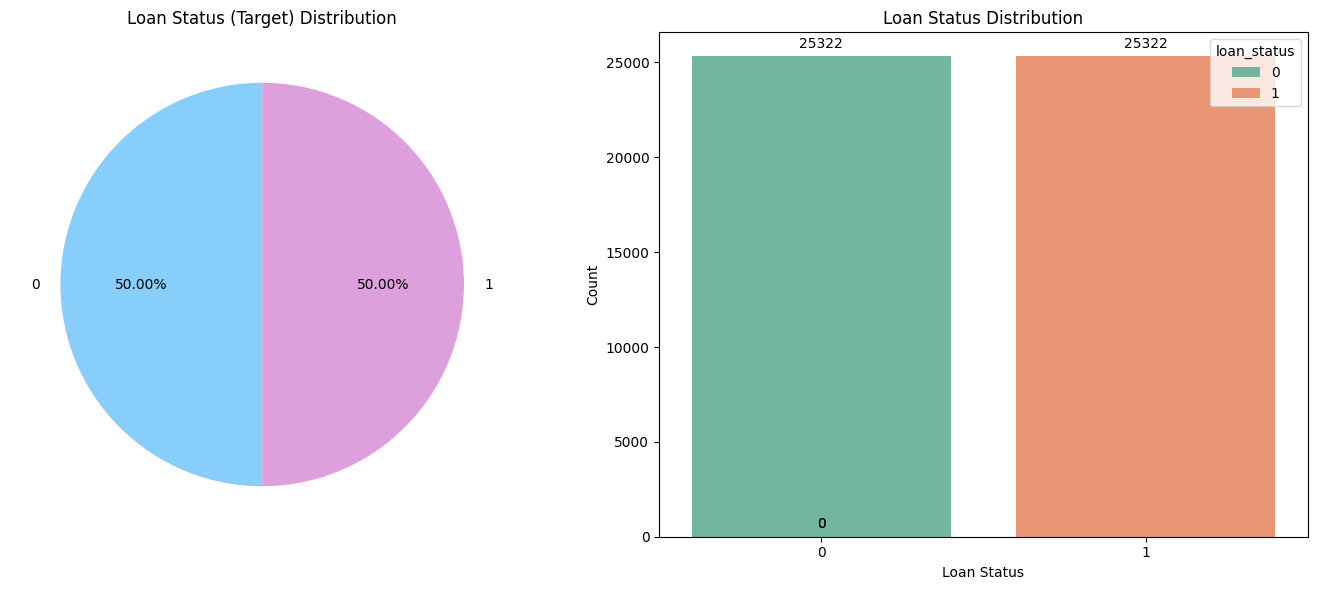

In [39]:
show_class_balance(credit)

# Training different models

In [40]:
def predict_model(model, X_test, y_test) :
    # Predict on test data
    y_pred = model.predict(X_test)
    
    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print(f'Accuracy: {accuracy:.2f}')
    
    # Classification report
    print(classification_report(y_test, y_pred))
    report = classification_report(y_test , y_pred , output_dict=True)
    # Confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

    return report

## Logistic Regression 

In [41]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

## Train test split

In [42]:
X = credit.drop('loan_status', axis=1)
y = credit['loan_status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=54)

In [43]:
# Initialize and fit logistic regression model
model = LogisticRegression(max_iter=10000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=10000)

Accuracy: 0.75
              precision    recall  f1-score   support

           0       0.75      0.75      0.75      5104
           1       0.75      0.75      0.75      5025

    accuracy                           0.75     10129
   macro avg       0.75      0.75      0.75     10129
weighted avg       0.75      0.75      0.75     10129



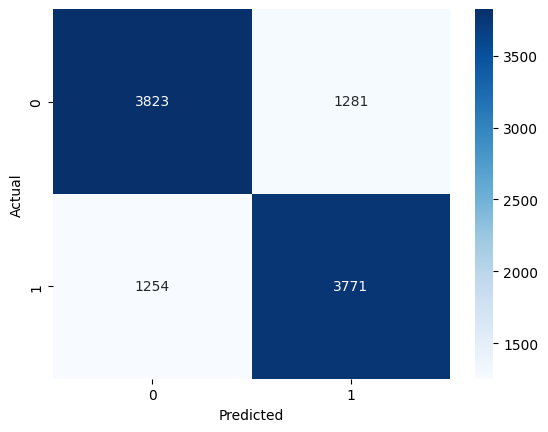

In [44]:
report1 = predict_model(model , X_test, y_test)

## Decision Tree Classifier

In [45]:
from sklearn.tree import DecisionTreeClassifier

In [46]:
# Initialize the Decision Tree Classifier
tree_model = DecisionTreeClassifier(random_state=54)
# Fit the model
tree_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=54)

Accuracy: 0.88
              precision    recall  f1-score   support

           0       0.88      0.88      0.88      5104
           1       0.88      0.88      0.88      5025

    accuracy                           0.88     10129
   macro avg       0.88      0.88      0.88     10129
weighted avg       0.88      0.88      0.88     10129



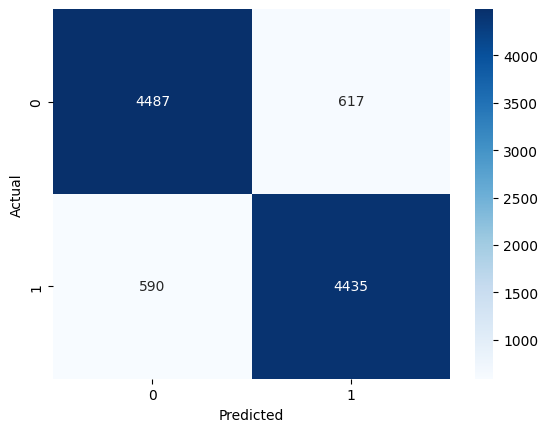

In [47]:
report2 = predict_model(tree_model , X_test, y_test)

## Support Vector Classifier

In [48]:
from sklearn.svm import SVC

# Initialize SVM model
svm_model = SVC(kernel='rbf', random_state=54)  

# Fit the model
svm_model.fit(X_train, y_train)

SVC(random_state=54)

Accuracy: 0.80
              precision    recall  f1-score   support

           0       0.78      0.83      0.81      5104
           1       0.82      0.76      0.79      5025

    accuracy                           0.80     10129
   macro avg       0.80      0.80      0.80     10129
weighted avg       0.80      0.80      0.80     10129



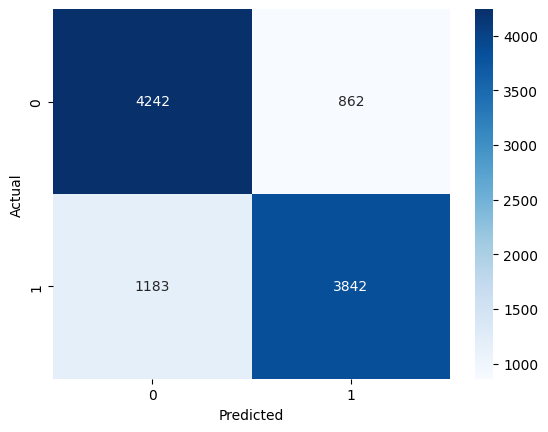

In [49]:
report3 = predict_model(svm_model, X_test, y_test)

## Random Forest Classifier

In [50]:
from sklearn.ensemble import RandomForestClassifier
# Initialize Random Forest model
rf_model = RandomForestClassifier(n_estimators=14, random_state=54)
# Fit the model
rf_model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=14, random_state=54)

Accuracy: 0.92
              precision    recall  f1-score   support

           0       0.89      0.97      0.93      5104
           1       0.96      0.88      0.92      5025

    accuracy                           0.92     10129
   macro avg       0.93      0.92      0.92     10129
weighted avg       0.93      0.92      0.92     10129



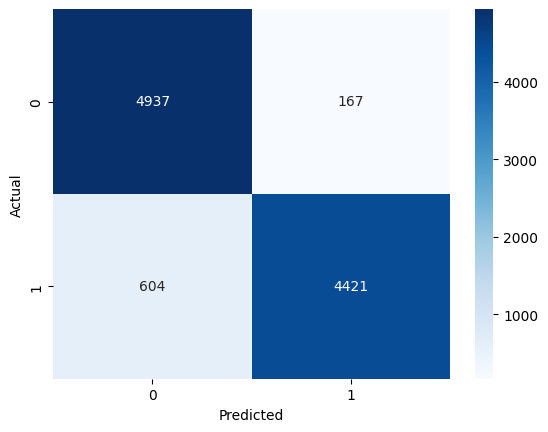

In [51]:
report4= predict_model(rf_model ,X_test, y_test)

## XGBoost 

In [55]:
# XGBoost

import xgboost as xgb
xgb_model = xgb.XGBClassifier(eval_metric='logloss')

# # Train the model
# xgb_model.fit(X_train, y_train)

In [56]:
# predict_model(xgb_model , X_test, y_test)

In [57]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 6, 10],
    'learning_rate': [0.01, 0.1, 0.2],
    'min_child_weight': [1, 5, 10]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(xgb_model, param_grid, cv=3, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Print best parameters
print("Best parameters:", grid_search.best_params_)


Best parameters: {'learning_rate': 0.2, 'max_depth': 6, 'min_child_weight': 1, 'n_estimators': 200}


In [58]:
# Initialize XGBoost with the best parameters
best_params = grid_search.best_params_
xgb_model = xgb.XGBClassifier(
    objective='binary:logistic', 
    learning_rate=best_params['learning_rate'],
    max_depth=best_params['max_depth'],
    min_child_weight=best_params['min_child_weight'],
    n_estimators=best_params['n_estimators'],
    #use_label_encoder=False,
    eval_metric='logloss'
)

# Fit the model to the training data
xgb_model.fit(X_train, y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.2, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=6,
              max_leaves=None, min_child_weight=1, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=200,
              n_jobs=None, num_parallel_tree=None, random_state=None, ...)

Accuracy: 0.95
              precision    recall  f1-score   support

           0       0.92      0.99      0.95      5104
           1       0.99      0.92      0.95      5025

    accuracy                           0.95     10129
   macro avg       0.95      0.95      0.95     10129
weighted avg       0.95      0.95      0.95     10129



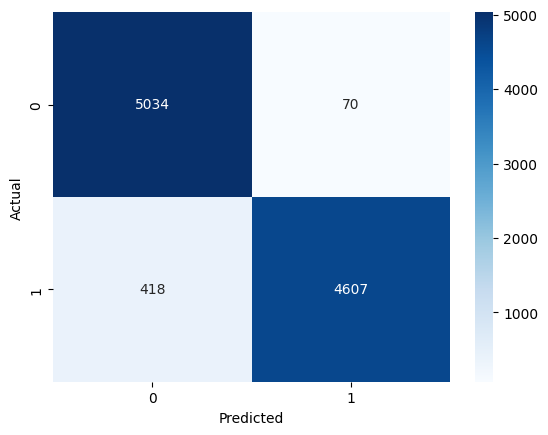

In [59]:
report5= predict_model(xgb_model, X_test , y_test)

In [60]:
models = ['Logistic Regression' , 'Decision Tree' , 'Support Vector Classifier', 'Random Forest', 'XGBoost']
model_metrics =dict()
model_metrics[models[0]] = report1
model_metrics[models[1]] = report2
model_metrics[models[2]] = report3
model_metrics[models[3]] = report4
model_metrics[models[4]] = report5

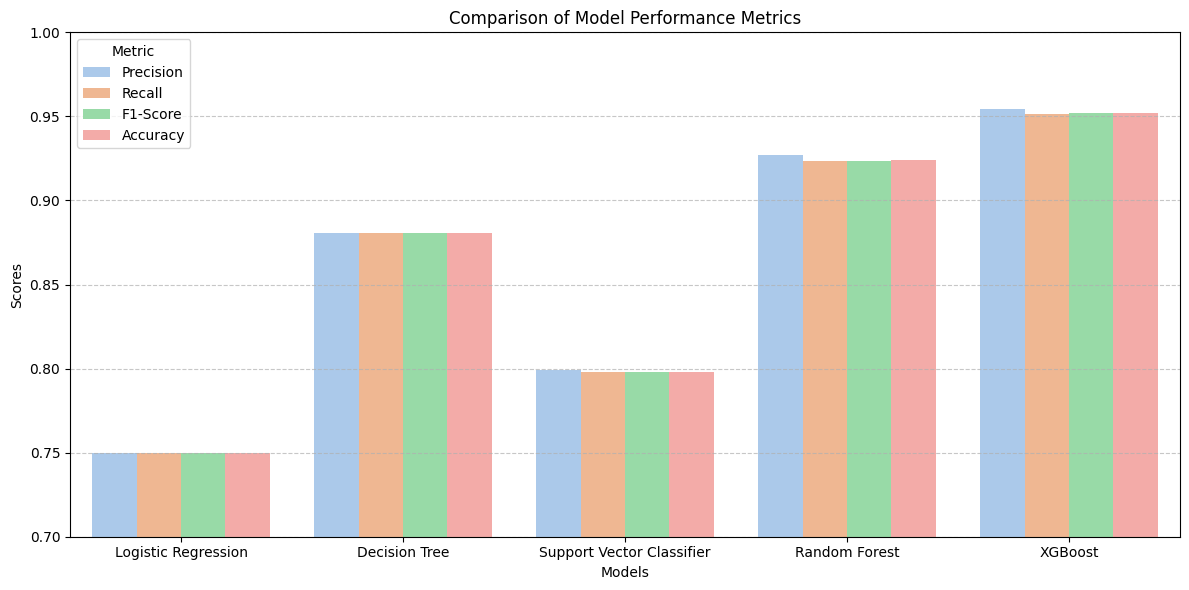

In [61]:
# Prepare data for visualization
metrics_data = []
for model, metrics in model_metrics.items():
    metrics_data.append({
        'Model': model,
        'Precision': metrics['macro avg']['precision'],
        'Recall': metrics['macro avg']['recall'],
        'F1-Score': metrics['macro avg']['f1-score'],
        'Accuracy': metrics['accuracy']
    })

# Convert to DataFrame
metrics_df = pd.DataFrame(metrics_data)

# Melt DataFrame for Seaborn compatibility
metrics_melted = metrics_df.melt(id_vars="Model", var_name="Metric", value_name="Score")

# Bar plot with Seaborn
plt.figure(figsize=(12, 6))
sns.barplot(data=metrics_melted, x="Model", y="Score", hue="Metric", palette="pastel")
plt.title("Comparison of Model Performance Metrics")
plt.xlabel("Models")
plt.ylabel("Scores")
plt.ylim(0.7, 1.0)  # Set limits for better comparison
plt.legend(title="Metric")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [62]:
import plotly.express as px
import plotly.io as pio

# Prepare data for visualization (same as before)
metrics_data = []
for model, metrics in model_metrics.items():
    metrics_data.append({
        'Model': model,
        'Precision': metrics['macro avg']['precision'],
        'Recall': metrics['macro avg']['recall'],
        'F1-Score': metrics['macro avg']['f1-score'],
        'Accuracy': metrics['accuracy']
    })

# Convert to DataFrame
metrics_df = pd.DataFrame(metrics_data)

# Melt DataFrame for Plotly compatibility
metrics_melted = metrics_df.melt(id_vars="Model", var_name="Metric", value_name="Score")

# Create a bar plot with Plotly
fig = px.bar(metrics_melted, 
             x="Model", 
             y="Score", 
             color="Metric", 
             barmode="group", 
             color_discrete_sequence=px.colors.qualitative.Pastel, 
             title="Comparison of Model Performance Metrics",
             labels={"Score": "Scores", "Model": "Models"},
             category_orders={"Metric": ["Precision", "Recall", "F1-Score", "Accuracy"]})

# Customize layout
fig.update_layout(
    xaxis_title="Models",
    yaxis_title="Scores",
    yaxis=dict(range=[0.7, 1.0]),  # Set limits for better comparison
    legend_title="Metric",
    template="plotly_white",
    xaxis_tickangle=-45  # Rotate model names for better readability
)

# Ensure the plot displays in Jupyter Notebook
pio.renderers.default = "notebook"  # Set the renderer to display in notebook
fig.show()
